# Homework
## Pengfei Cheng
## AndrewID: pengfeic
<br>

<b>Note</b>: Please select '<b>Restart & Run All</b>' to make sure everything works well.

# Problem 1

In [1]:
import pip
pip.main(['install', '-U', 'pycse==1.6.3'])
pip.main(['install', '-U', 'uncertainties'])
pip.main(['install', '-U', 'quantities'])

from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import numpy as np
import matplotlib.pyplot as plt
from pycse import odelay

# import packages for Problem 1

Requirement already up-to-date: pycse==1.6.3 in /home/nbcommon/anaconda3_410/lib/python3.5/site-packages
  Found existing installation: quantities 0.12.1
    Uninstalling quantities-0.12.1:
      Successfully uninstalled quantities-0.12.1
Requirement already up-to-date: uncertainties in /home/nbcommon/anaconda3_410/lib/python3.5/site-packages
Requirement already up-to-date: quantities in /home/nbcommon/anaconda3_410/lib/python3.5/site-packages


Exception:
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_410/lib/python3.5/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/home/nbuser/anaconda3_410/lib/python3.5/site-packages/pip/commands/install.py", line 335, in run
    wb.build(autobuilding=True)
  File "/home/nbuser/anaconda3_410/lib/python3.5/site-packages/pip/wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "/home/nbuser/anaconda3_410/lib/python3.5/site-packages/pip/req/req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "/home/nbuser/anaconda3_410/lib/python3.5/site-packages/pip/req/req_set.py", line 666, in _prepare_file
    check_dist_requires_python(dist)
  File "/home/nbuser/anaconda3_410/lib/python3.5/site-packages/pip/utils/packaging.py", line 48, in check_dist_requires_python
    feed_parser.feed(metadata)
  File "/home/nbuser/anaconda3_410/lib/python3.5/email/feedp

## Problem 1A

For Reaction 1:
\begin{equation}
    r_1 = k_1 C_\mathrm{A}^2
\end{equation}

For Reaction 2:
\begin{equation}
    r_2 = k_2 C_\mathrm{B}
\end{equation}

## Problem 1B

To A,

\begin{align*}
    \mathrm{d} N_\mathrm{A} / \mathrm{d} t &=  F_\mathrm{A0} - F_\mathrm{A} + V r_\mathrm{A}
\end{align*}

In this case, $F_\mathrm{A0} = F_\mathrm{A} = 0$. So

\begin{align*}
    \mathrm{d} C_\mathrm{A} / \mathrm{d} t &= r_\mathrm{A}
\end{align*}

So is B, C and D.

\begin{align*}
      r_\mathrm{A} &= -2r_1 \\
      r_\mathrm{B} &=  2r_1 - r_2 \\
      r_\mathrm{C} &= 2r_1 \\
      r_\mathrm{D} &= r_2
\end{align*}

### 1B-1
Rates of species are chosen as variables of ODEs in this part.

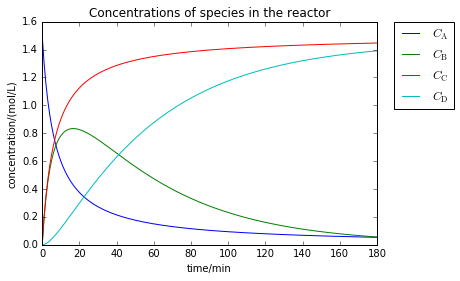

In [2]:
V = 100 # L
k1 = 0.05 # L/mol/min
k2 = 0.022 # 1/min
C0 = np.array([1.5, 0, 0, 0]).T # mol/L initial concentrations for all species
alpha = np.array([[-2, 2, 2, 0], [0, -1,0,1]]).T # stoichiometric numbers

def r(C,t):
    r1 = k1 * C[0] ** 2
    r2 = k2 * C[1]
    r = np.matmul (alpha, [r1, r2])
    return r

tspan = np.linspace (0, 180, 180)

sol = odeint (r, C0, tspan)

labels = ['$C_\mathrm{A}$','$C_\mathrm{B}$','$C_\mathrm{C}$','$C_\mathrm{D}$']

for i in range (4):
    plt.plot (tspan, sol[:,i],label=labels[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Concentrations of species in the reactor')
plt.xlabel('time/min')
plt.ylabel('concentration/(mol/L)')
plt.show()

### 1B-2
Rates of reactions are chosen as variables of ODEs in this part.

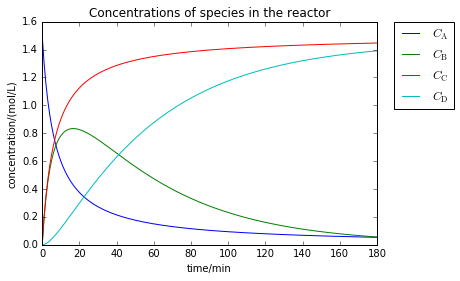

In [3]:
Xi0 = np.array([0,0]).T

def rr(Xi,t):
    C = C0 + np.matmul(alpha,Xi)
    r1 = k1 * C[0] ** 2
    r2 = k2 * C[1]
    return [r1, r2]

Sol = odeint (rr, Xi0, tspan).T

C =np.matmul(alpha, Sol)

C[0] = C[0] + 1.5

labels = ['$C_\mathrm{A}$','$C_\mathrm{B}$','$C_\mathrm{C}$','$C_\mathrm{D}$']

for i in range (4):
    plt.plot (tspan, C[i],label=labels[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Concentrations of species in the reactor')
plt.xlabel('time/min')
plt.ylabel('concentration/(mol/L)')
plt.show()

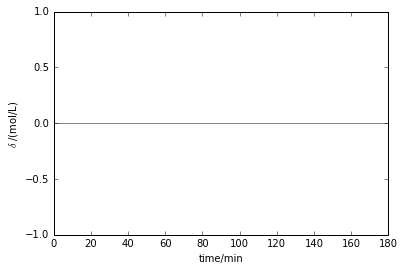

In [4]:
plt.plot(tspan, sol-C.T)
plt.ylim([-1,1])
plt.xlabel('time/min')
plt.ylabel('$\\delta$ /(mol/L)')
plt.show()

So 2 solutions are identical.

## Problem 1C

In [5]:
def event(C, t):
    'maximize the concentration of B'
    value = np.amax (sol[:,1]) - C[1]
    isterminal = True
    direction = 0
    return value, isterminal, direction
    
t, C, te, Ce, ie = odelay(r, C0, tspan, [event])

print ('C_B reaches its maximum, {0:1.3f} mol/L, when t = {1:1.3f} min.'.format(Ce[0,1],te[0]))

C_B reaches its maximum, 0.833 mol/L, when t = 17.095 min.


## Problem 1D

In [6]:
C1 = np.array([0.75, 0, 0, 0]).T

sol_2 = odeint (r, C1, tspan)

def event2(C,t):
    value = np.amax (sol_2[:,1]) - C[1]
    isterminal = True
    direction = 0
    return value, isterminal, direction

t2, C2, te2, Ce2, ie2 = odelay (r, C1, tspan, [event2])

print ('C_B reaches its first maximum, {0:1.3f} mol/L when t = {1:1.3f} min.'.format(Ce2[0,1],te2[0]))

C_B reaches its first maximum, 0.343 mol/L when t = 23.116 min.


In [7]:
Ce2[0,0] += 0.75

sol_3 = odeint (r, Ce2[0,:], tspan)

def event3(C,t):
    value = np.amax (sol_3[:,1]) - C[1]
    isterminal = True
    direction = 0
    return value, isterminal, direction

t3, C3, te3, Ce3, ie3 = odelay (r, Ce2[0], tspan, [event3])
print ('C_B reaches its second maximum, {0:1.3f} mol/L when t = {1:1.3f} min.'.format(Ce3[0,1],te3[0]+te2[0]))

C_B reaches its second maximum, 0.749 mol/L when t = 38.198 min.


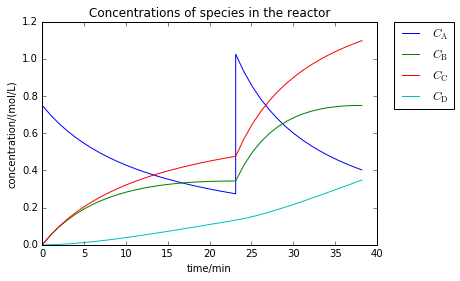

In [8]:
t4 = np.array (t3 + te2)

tt = np.concatenate((t2, t4),axis=0)
Ct = np.concatenate((C2,C3),axis=0)

for i in range (4):
    plt.plot (tt, Ct[:,i],label=labels[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Concentrations of species in the reactor')
plt.xlabel('time/min')
plt.ylabel('concentration/(mol/L)')
plt.show()

The maximum concentation of B in Stage 2 is lower than it was in Part 1B.

# Problem 2

In [9]:
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import numpy as np
import matplotlib.pyplot as plt
from pycse import odelay

# import packages for Problem 2

## Problem 2A

\begin{align*}
    r_1 &= k_1 C_\mathrm{B} ^2 -\frac{k_1}{K_1} C_\mathrm{D} C_\mathrm{H} \\
    r_2 &= k_2 C_\mathrm{B} C_\mathrm{D} - \frac{k_2}{K_2} C_\mathrm{T} C_\mathrm{H}
\end{align*}

## Problem 2B

According to the Ideal Gas Equation of State,
\begin{equation*}
    pV=nRT \to v=\frac{FRT}{p} = \frac{60\times1000\times8.314\times1033}{101325} = 5086 \mathrm{\ m^3 / h}
\end{equation*}

$\sum_i \alpha_{1i} = \sum_i \alpha_{2i} = 0$, so the volumetric flow rate will not change along the length of the reactor.

## Problem 2C
For PFR, we get 
\begin{equation*}
    \frac{\mathrm{d}F_\mathrm{A}}{\mathrm{d}V} = r_\mathrm{A}
\end{equation*}

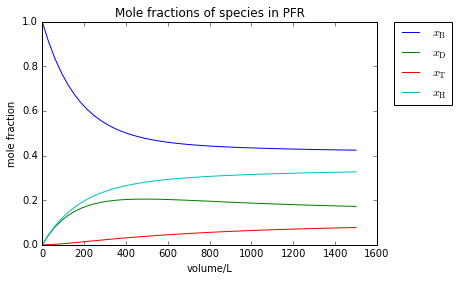

In [10]:
F0 = np.array([60 * 1000, 0, 0, 0]).T # mol/h, referring to the concentrations of B, D, T, H respectively
alpha = np.array ([[-2,1,0,1],[-1,-1,1,1]]).T # stoichiometric numbers
v0 = 5086 * 1000 # L / h
k1 = 7 * 10 ** 5 # L/mol/h
k2 = 4 * 10 ** 5 # L/mol/h
K1 = 0.31
K2 = 0.48
V = 1500 # L

def r(F,V):
    C = F / v0
    r1 = k1 * C[0] ** 2 - k1 / K1 * C[1] * C[3]
    r2 = k2 * C[0] * C[1] - k2 / K2 * C[2] * C[3]
    r = np.matmul (alpha, [r1, r2])
    return r

Vspan = np.linspace (0, V)

sol = odeint (r, F0, Vspan)

x = np.array(sol / sum(F0))
labels = ['$x_\mathrm{B}$','$x_\mathrm{D}$','$x_\mathrm{T}$','$x_\mathrm{H}$']

for i in range (4):
    plt.plot (Vspan, x[:,i],label=labels[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mole fractions of species in PFR')
plt.xlabel('volume/L')
plt.ylabel('mole fraction')
plt.show()

## Problem 2D

In [11]:
def event (F, V):
    C = F / v0
    value = 0.5 - C[0] / (F0[0] / v0)
    isterminal = True
    direction = 0
    return value, isterminal, direction

V,F, Ve, Fe, te = odelay (r, F0, Vspan, [event])
print('The reactor achieves 50% conversion of benzene at {:1.3f} L.'.format(Ve[0]))

The reactor achieves 50% conversion of benzene at 403.335 L.


## Problem 2E

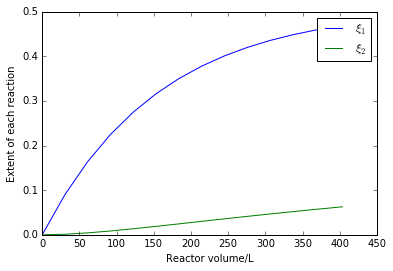

The volume required for 50% conversion is 403.34 L.


In [12]:
xi0 = np.array ([0, 0]).T # initial extent

def dxidV(xi, V):
    F = F0 + np.matmul(alpha, xi)
    C = F / v0
    r1 = k1 * C[0] ** 2 - k1 / K1 * C[1] * C[3]
    r2 = k2 * C[0] * C[1] - k2 / K2 * C[2] * C[3]
    return [r1, r2]

def event(xi, V):
    value = xi[0] + 0.5 * xi[1] - 30000 * 0.5
    isterminal = True
    direction = 0
    return value, isterminal, direction

Vrange = np.linspace(0, 1500)
V, xi, Ve, xie, ie = odelay(dxidV, xi0, Vrange, [event])

plt.plot(V, xi/30000)
plt.xlabel('Reactor volume/L')
plt.ylabel('Extent of each reaction')
plt.legend(labels=['$\\xi_1$','$\\xi_2$'])
plt.show()
print('The volume required for 50% conversion is {:1.2f} L.'.format(Ve[0]))